In [57]:
import json, yaml
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

CONFIG_PATH = "../config/config.yaml"

In [58]:
with open('../newest_ts', 'r') as f:
    newest_ts = f.read()

data_path = f"../data/data_{newest_ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

with open(CONFIG_PATH, "r") as stream:
    config = yaml.safe_load(stream)

TIME_ZONE = config['time_zone']
DATETIME_FORMAT = config['dt_format']

In [64]:
def ts2dt(ts, format=DATETIME_FORMAT):
    dt = (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    # .astimezone(tz.tzlocal())
                    .astimezone(tz.gettz(TIME_ZONE)))
    return dt.strftime(format), dt

_, newest_dt = ts2dt(newest_ts)
print(f"Recent query happens at {newest_dt.strftime(DATETIME_FORMAT)} ({newest_dt.tzname()}).")

Recent query happens at 2021-08-23 01:41:05 (China Standard Time).


In [93]:
def degrees_to_cardinal(d):
  dirs = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
  ix = int(round(d / (360. / len(dirs))))
  return dirs[ix % len(dirs)]

In [111]:
data.keys()

In [110]:
# data['current']

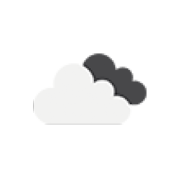

Today, sun rises at 06:03 and sets at 18:48.
Currently, the weather is Clouds (broken clouds).
The UV index is 0, humidity is 82%.
The pressure is 1007 hPa, percentage of cloud cover is 58%
The wind comes from SSW direction with a speed 3.74 m/s.


In [109]:
current = data['current']

fig, ax = plt.subplots(figsize=(3, 3))
icon = plt.imread(f"http://openweathermap.org/img/wn/{current['weather'][0]['icon']}@2x.png")
plt.imshow(icon)
ax.set_axis_off()
plt.show()

print(f"Today, sun rises at {ts2dt(current['sunrise'], '%H:%M')[0]} \
and sets at {ts2dt(current['sunset'], '%H:%M')[0]}.\n\
Currently, the weather is {current['weather'][0]['main']} ({current['weather'][0]['description']}).\n\
The UV index is {current['uvi']}, humidity is {current['humidity']}%.\n\
The pressure is {current['pressure']} hPa, percentage of cloud cover is {current['clouds']}%\n\
The wind comes from {degrees_to_cardinal(current['wind_deg'])} direction with a speed {current['wind_speed']} m/s.")

In [8]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

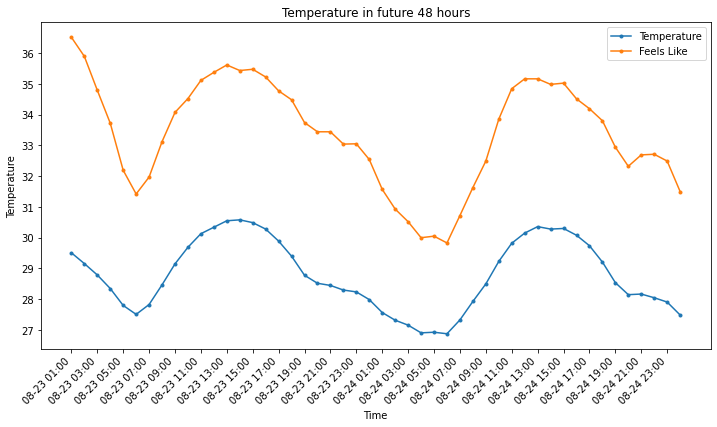

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-', label='Temperature')
plt.plot(df_hourly.feels_like, '.-', label='Feels Like')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M')[0] for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
ax.locator_params(nbins=15, axis='y')
plt.legend()
plt.show()

In [9]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629651600,29.51,36.51,1007,82,26.11,0.0,50,10000,3.20,207,4.71,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.04,NaN
1,1629655200,29.16,35.89,1007,83,25.97,0.0,52,10000,3.74,205,5.23,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.12,NaN
2,1629658800,28.79,34.79,1007,83,25.61,0.0,70,10000,3.86,205,5.25,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.73,NaN
3,1629662400,28.35,33.72,1006,84,25.38,0.0,79,10000,3.56,212,4.97,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.73,{'1h': 0.33}
4,1629666000,27.80,32.19,1007,84,24.85,0.0,78,10000,3.17,215,4.36,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.81,{'1h': 0.45}
